# Dowload the datasets

In [2]:
!unzip '../data/1mayo - agosto 2021.csv.zip' -d '../data/.raw' -n

Archive:  ../data/1mayo - agosto 2021.csv.zip
caution: filename not matched:  -n


In [3]:
!unzip '../data/2agosto -dic 2021.csv.zip' -d '../data/.raw' -n

Archive:  ../data/2agosto -dic 2021.csv.zip
caution: filename not matched:  -n


# Import libraries and dowload datasets

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
df1 = pd.read_csv('../data/.raw/1mayo - agosto 2021.csv')
df2 = pd.read_csv('../data/.raw/2agosto -dic 2021.csv')

In [6]:
df = pd.concat([df1,df2])
# df = df1

# Preprocess data

In [7]:
from sklearn.model_selection import train_test_split

def transform_dataset(df):
  # if we already transformed the dataset - just leave
  if 'fecha_esp32' not in df:
    return df

  df.drop(['fecha_esp32','MAC','weekday'], axis=1, inplace=True)
  df['fecha_servidor'] = pd.to_datetime(df['fecha_servidor'])
  df.sort_values(['fecha_servidor'], ascending=True, inplace=True)
  df.set_index('fecha_servidor', inplace=True)

  column_name_mapping = {
    'fecha_servidor': 'server_timestamp',
    'voltaje': 'voltage',
    'corriente': 'current',
    'potencia': 'power',
    'frecuencia': 'frequency',
    'energia': 'energy',
    'fp': 'power_factor',
    'ESP32_temp': 'esp32_temperature',
    'WORKSTATION_CPU': 'workstation_cpu',
    'WORKSTATION_CPU_POWER': 'workstation_cpu_power',
    'WORKSTATION_CPU_TEMP': 'workstation_cpu_temperature',
    'WORKSTATION_GPU': 'workstation_gpu',
    'WORKSTATION_GPU_POWER': 'workstation_gpu_power',
    'WORKSTATION_GPU_TEMP': 'workstation_gpu_temperature',
    'WORKSTATION_RAM': 'workstation_ram',
    'WORKSTATION_RAM_POWER': 'workstation_ram_power'
  }

  df.rename(columns=column_name_mapping, inplace=True)

  return df

def split_data(df,y):
  return train_test_split(df.drop([y],axis=1), df[y], test_size=0.3,random_state=609)


# we need to compress data because we have too much of data and it takes a lot of time (11 MLN rows)

In [8]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 11065619 entries, 0 to 3178050
Data columns (total 19 columns):
 #   Column                 Non-Null Count     Dtype  
---  ------                 --------------     -----  
 0   MAC                    11065619 non-null  object 
 1   weekday                11065619 non-null  int64  
 2   fecha_servidor         11065619 non-null  object 
 3   fecha_esp32            11065619 non-null  object 
 4   voltaje                11065619 non-null  float64
 5   corriente              11065619 non-null  float64
 6   potencia               11065619 non-null  float64
 7   frecuencia             11065619 non-null  float64
 8   energia                11065619 non-null  float64
 9   fp                     11065619 non-null  float64
 10  ESP32_temp             11065619 non-null  float64
 11  WORKSTATION_CPU        11065619 non-null  float64
 12  WORKSTATION_CPU_POWER  11065619 non-null  float64
 13  WORKSTATION_CPU_TEMP   11065619 non-null  int64  
 14  WORKST

In [9]:
transform_dataset(df)

,voltage,current,power,frequency,energy,power_factor,esp32_temperature,workstation_cpu,workstation_cpu_power,workstation_cpu_temperature,workstation_gpu,workstation_gpu_power,workstation_gpu_temperature,workstation_ram,workstation_ram_power
fecha_servidor,,,,,,,,,,,,,,,
2021-05-05 22:05:27,119.9,1.150,126.4,60.0,0.000,0.92,0.0000,0.00,0.00,0,0.0,0,0.00,0.00,0.00
2021-05-05 22:05:28,119.9,1.150,126.4,60.0,0.000,0.92,0.0000,0.00,0.00,0,0.0,0,0.00,0.00,0.00
2021-05-05 22:05:28,119.9,1.090,118.5,60.0,0.000,0.91,0.0000,0.00,0.00,0,0.0,0,0.00,0.00,0.00
2021-05-05 22:05:29,119.9,1.090,118.5,60.0,0.000,0.91,0.0000,0.00,0.00,0,0.0,0,0.00,0.00,0.00
2021-05-05 22:05:29,120.0,1.010,107.7,60.0,0.000,0.89,0.0000,0.00,0.00,0,0.0,0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-04 08:18:10,118.8,0.712,82.3,59.9,24.850,0.97,53.3333,5.08,34.68,26,0.0,30,0.00,24.95,8.31
2021-12-04 08:18:11,118.9,0.675,78.5,59.9,24.850,0.98,53.3333,5.21,34.68,26,0.0,30,0.00,24.94,8.31
2021-12-04 08:18:11,119.6,1.189,130.3,59.9,442.626,0.92,53.3333,13.18,38.38,35,0.0,34,14.23,48.58,5.58


<Axes: >

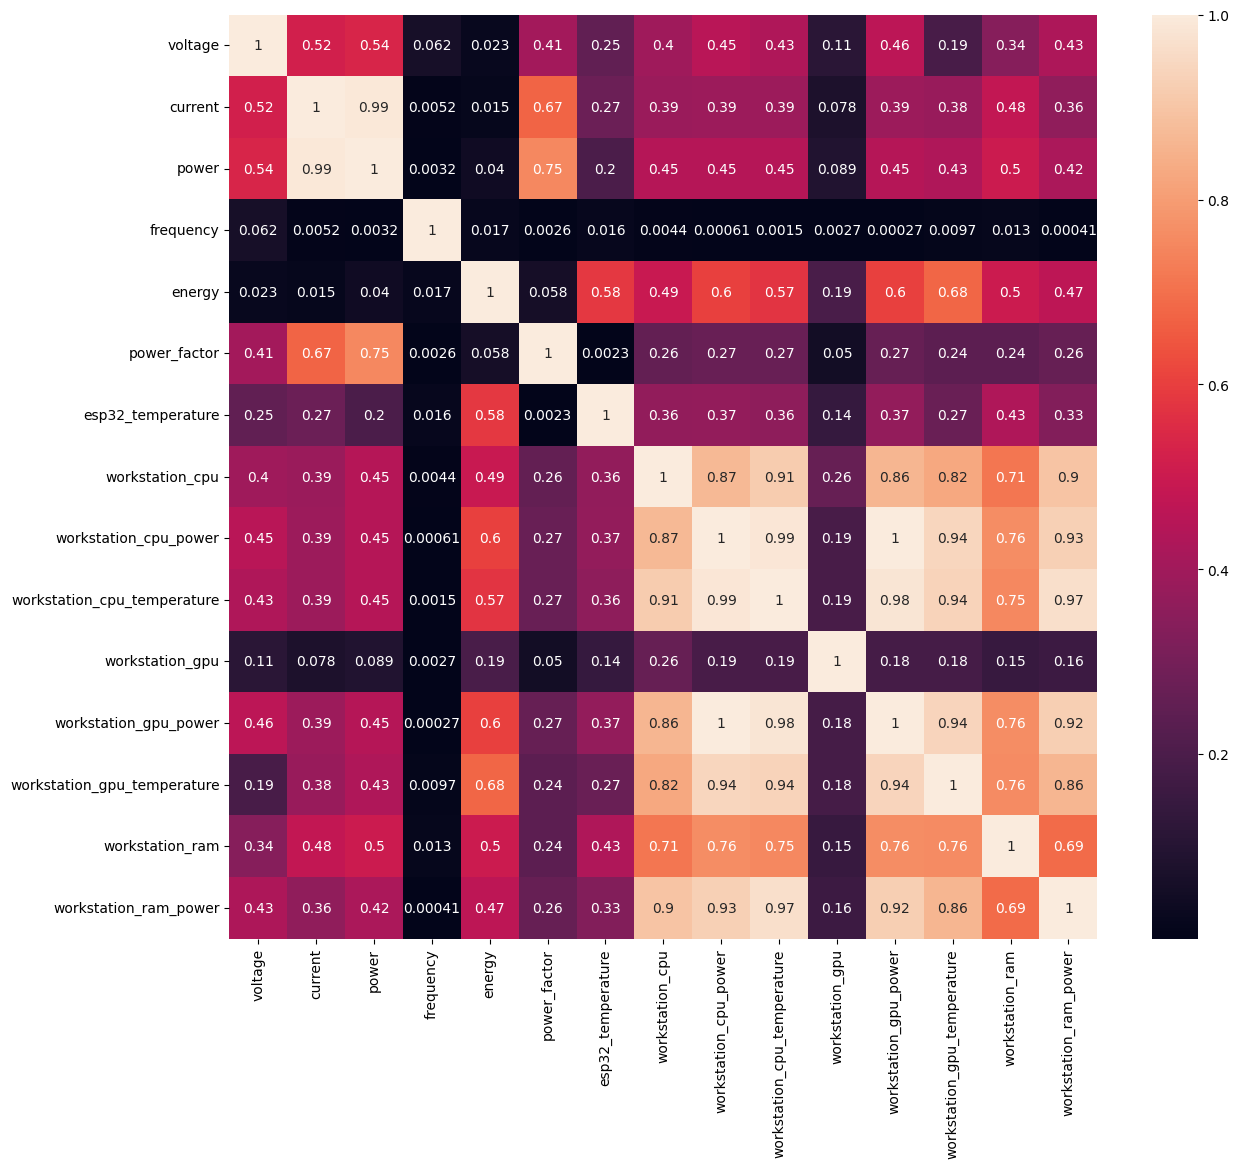

In [10]:
import seaborn as sns
plt.figure(figsize=(14, 12))

sns.heatmap(df.corr().abs(),annot=True,)
# we have a lot of so-correlated features

In [11]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                #print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)
    print('Removed Columns {}'.format(drops))
    return x

In [12]:
df = remove_collinear_features(df,0.8)

Removed Columns {'workstation_cpu_temperature', 'workstation_cpu_power', 'power', 'workstation_gpu_power', 'workstation_ram_power', 'workstation_gpu_temperature'}


<Axes: >

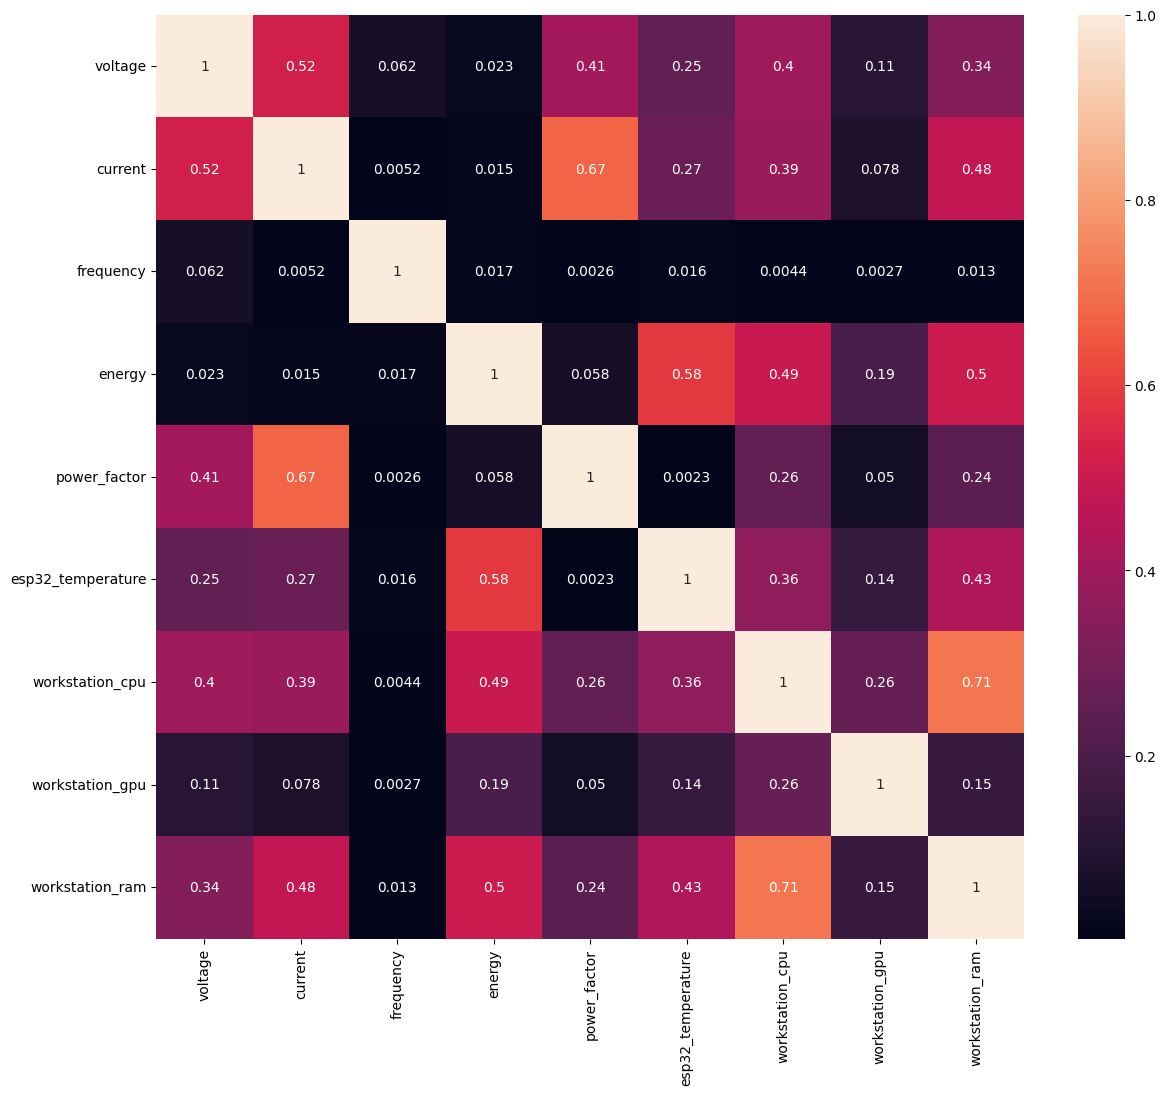

In [13]:

plt.figure(figsize=(14, 12))

sns.heatmap(df.corr().abs(),annot=True,)

# Profiling after processing

In [14]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report")

profile.to_file('../reports/report_eda.html')


/opt/homebrew/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/homebrew/lib/python3.11/site-packages/visions/backends/shared/nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
df = df.resample('T').mean()

In [16]:
df

,voltage,current,frequency,energy,power_factor,esp32_temperature,workstation_cpu,workstation_gpu,workstation_ram
fecha_servidor,,,,,,,,,
2021-05-05 22:05:00,119.996610,0.975085,59.984746,0.000000,0.876780,0.000000,0.000000,0.0,0.000000
2021-05-05 22:06:00,120.017391,0.946957,59.991304,0.000000,0.865652,0.000000,0.000000,0.0,0.000000
2021-05-05 22:07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-05 22:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-05 22:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-12-04 08:14:00,119.190000,0.934358,59.965000,233.731750,0.941583,50.800899,9.674000,0.0,36.842500
2021-12-04 08:15:00,119.206667,0.929358,59.920000,233.733467,0.941250,50.962935,9.644000,0.0,36.877583
2021-12-04 08:16:00,119.184034,0.924244,59.996639,231.979832,0.941597,50.513513,9.083109,0.0,36.667815


In [17]:
df.dropna(inplace=True)
df

,voltage,current,frequency,energy,power_factor,esp32_temperature,workstation_cpu,workstation_gpu,workstation_ram
fecha_servidor,,,,,,,,,
2021-05-05 22:05:00,119.996610,0.975085,59.984746,0.000000,0.876780,0.000000,0.000000,0.0,0.000000
2021-05-05 22:06:00,120.017391,0.946957,59.991304,0.000000,0.865652,0.000000,0.000000,0.0,0.000000
2021-05-05 22:14:00,119.986667,1.031333,60.000000,0.020000,0.896000,0.000000,0.000000,0.0,0.000000
2021-05-05 22:15:00,120.035000,0.955200,59.996000,0.020000,0.869300,0.000000,0.000000,0.0,0.000000
2021-05-05 22:16:00,120.034545,0.942545,59.966364,0.020000,0.862909,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
2021-12-04 08:14:00,119.190000,0.934358,59.965000,233.731750,0.941583,50.800899,9.674000,0.0,36.842500
2021-12-04 08:15:00,119.206667,0.929358,59.920000,233.733467,0.941250,50.962935,9.644000,0.0,36.877583
2021-12-04 08:16:00,119.184034,0.924244,59.996639,231.979832,0.941597,50.513513,9.083109,0.0,36.667815


In [18]:
profile = ProfileReport(df, title="Profiling Report")

profile.to_file('../reports/report_resampling.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: >

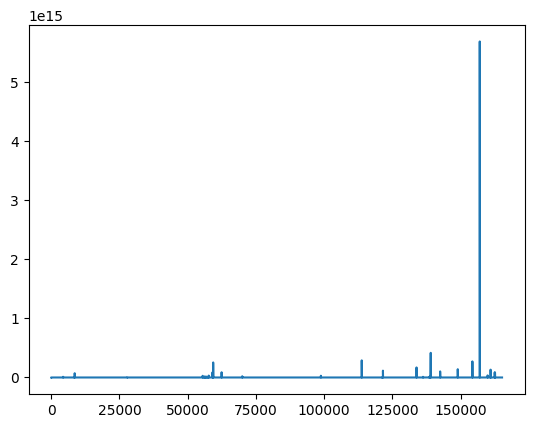

In [19]:
times_gaps = df.index - pd.Series(df.index).shift(1)

times_gaps.plot()

# Test without tracking

In [20]:
from sklearn.preprocessing import StandardScaler

df = transform_dataset(df)
standard_scaler = StandardScaler()

df = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns,index=df.index)

In [21]:
df

,voltage,current,frequency,energy,power_factor,esp32_temperature,workstation_cpu,workstation_gpu,workstation_ram
fecha_servidor,,,,,,,,,
2021-05-05 22:05:00,-0.212173,0.732317,0.885687,-1.688962,0.122026,-2.045511,-0.659204,-0.190153,-0.871374
2021-05-05 22:06:00,-0.125732,0.615500,1.184019,-1.688962,0.048384,-2.045511,-0.659204,-0.190153,-0.871374
2021-05-05 22:14:00,-0.253534,0.965917,1.579560,-1.688712,0.249228,-2.045511,-0.659204,-0.190153,-0.871374
2021-05-05 22:15:00,-0.052487,0.649735,1.397611,-1.688712,0.072525,-2.045511,-0.659204,-0.190153,-0.871374
2021-05-05 22:16:00,-0.054377,0.597181,0.049535,-1.688712,0.030230,-2.045511,-0.659204,-0.190153,-0.871374
...,...,...,...,...,...,...,...,...,...
2021-12-04 08:14:00,-3.567354,0.563180,-0.012493,1.227068,0.550903,1.785793,2.300871,-0.190153,1.079780
2021-12-04 08:15:00,-3.498027,0.542415,-2.059417,1.227089,0.548697,1.798014,2.291692,-0.190153,1.081638
2021-12-04 08:16:00,-3.592172,0.521173,1.426661,1.205211,0.550991,1.764119,2.120069,-0.190153,1.070529


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer, r2_score
import mlflow
from sklearn.model_selection import train_test_split
from scipy.stats import loguniform


from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge

X_train, X_test, y_train, y_test = split_data(df,'energy')


cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=609)


space = dict()
space['alpha'] = np.logspace(-2, 0, 100) 
space['fit_intercept'] = [True, False]

model = Lasso(0.1, random_state=609, tol=1e-2)

scoring = {
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'neg_mean_absolute_error': 'neg_mean_absolute_error',
    'neg_root_mean_squared_error': make_scorer(lambda y_true, y_pred: -np.sqrt(mean_squared_error(y_true, y_pred))),
    'r2': 'r2',
}

search = RandomizedSearchCV(model, space,refit='neg_mean_absolute_error', n_iter=200, scoring=scoring, n_jobs=-1, cv=cv, random_state=609,verbose=True)


result = search.fit(X_train, y_train)

print("mae", -result.best_score_)
print(result.best_params_)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
mae 0.5335602992330966
{'fit_intercept': False, 'alpha': 0.01}


<Axes: xlabel='fecha_servidor'>

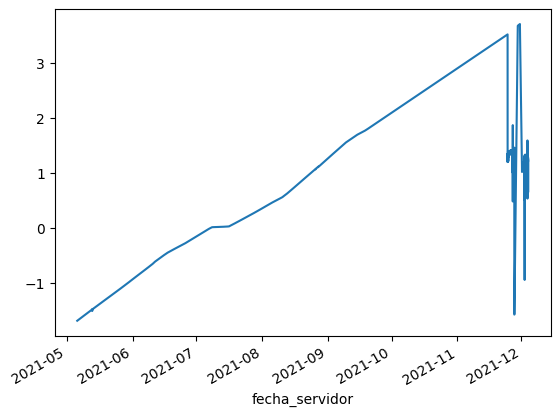

In [23]:
df['energy'].plot()

# Mlflow

In [24]:
# save the holdout dataset
X_test.to_csv('../data/test/X_test.csv')


y_test.to_csv('../data/test/y_test.csv')

In [28]:
# First, we will start with simple linear models because often the easiest ones are the best
import mlflow
from sklearn.model_selection import train_test_split
from scipy.stats import loguniform


from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge

from sklearn.model_selection import GridSearchCV





mlflow.set_tracking_uri("sqlite:///../ml_flow.db")
mlflow.set_experiment("iml-dc")
from sklearn import datasets, linear_model, metrics

with mlflow.start_run(run_name='Lasso'):
    mlflow.set_tag("workspace", "default")
    mlflow.log_param("train_data_name", "1mayo - agosto 2021")
    mlflow.log_param("validation_data_name", "2agosto -dic 2021")

    df = transform_dataset(df)

    standard_scaler = StandardScaler()

    df = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns,index=df.index)

    X_train, X_test, y_train, y_test = split_data(df,'energy')

    
    cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=609)


    space = dict()
    space['alpha'] = np.logspace(-4, 0, 100) 
    space['fit_intercept'] = [True, False]

    model = Lasso(0.1, random_state=609, tol=1e-2)

    scoring = {
        'neg_mean_squared_error': 'neg_mean_squared_error',
        'neg_mean_absolute_error': 'neg_mean_absolute_error',
        'neg_root_mean_squared_error': make_scorer(lambda y_true, y_pred: -np.sqrt(mean_squared_error(y_true, y_pred))),
        'r2': 'r2',
    }

    search = GridSearchCV(model, space,refit='neg_mean_absolute_error',  scoring=scoring, n_jobs=-1, cv=cv, verbose=True)


    result = search.fit(X_train, y_train,)
    
    mlflow.log_metric("mae", -result.best_score_)
    mlflow.log_params(result.best_params_)
    
    mlflow.sklearn.log_model(result.best_estimator_, "lasso_model")
    print("Model saved in run %s" % mlflow.active_run().info.run_uuid)

    
mlflow.end_run()


Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Model saved in run f25524226bc34095a03bb0abf878f015


In [29]:
with mlflow.start_run(run_name='Linear Regression'):
    mlflow.set_tag("workspace", "default")
    mlflow.log_param("train_data_name", "1mayo - agosto 2021")
    mlflow.log_param("validation_data_name", "2agosto -dic 2021")

    df = transform_dataset(df)

    standard_scaler = StandardScaler()

    df = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns,index=df.index)

    X_train, X_test, y_train, y_test = split_data(df,'energy')

    
    cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=609)


    space = dict()
    space['fit_intercept'] = [True, False]

    model = LinearRegression()

    scoring = {
        'neg_mean_squared_error': 'neg_mean_squared_error',
        'neg_mean_absolute_error': 'neg_mean_absolute_error',
        'neg_root_mean_squared_error': make_scorer(lambda y_true, y_pred: -np.sqrt(mean_squared_error(y_true, y_pred))),
        'r2': 'r2',
    }

    search = RandomizedSearchCV(model, space,refit='neg_mean_absolute_error', n_iter=200, scoring=scoring, n_jobs=-1, cv=cv, random_state=609,verbose=True)


    result = search.fit(X_train, y_train)
    
    mlflow.log_metric("mae", -result.best_score_)
    mlflow.log_params(result.best_params_)
    mlflow.sklearn.log_model(result.best_estimator_, "lasso_model")
    print("Model saved in run %s" % mlflow.active_run().info.run_uuid)

    
mlflow.end_run()

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=200. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Model saved in run a32db710b6bc4a818caf956c5b3691ec


In [30]:
with mlflow.start_run(run_name='Ridge'):
    mlflow.set_tag("workspace", "default")
    mlflow.log_param("train_data_name", "1mayo - agosto 2021")
    mlflow.log_param("validation_data_name", "2agosto -dic 2021")

    df = transform_dataset(df)

    standard_scaler = StandardScaler()

    df = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns,index=df.index)

    X_train, X_test, y_train, y_test = split_data(df,'energy')

    
    cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=609)


    space = dict()
    space['alpha'] = np.logspace(-3, 0, 100) 

    space['fit_intercept'] = [True, False]

    model = Ridge(0.1)

    scoring = {
        'neg_mean_squared_error': 'neg_mean_squared_error',
        'neg_mean_absolute_error': 'neg_mean_absolute_error',
        'neg_root_mean_squared_error': make_scorer(lambda y_true, y_pred: -np.sqrt(mean_squared_error(y_true, y_pred))),
        'r2': 'r2',
    }

    search = RandomizedSearchCV(model, space,refit='neg_mean_absolute_error', n_iter=200, scoring=scoring, n_jobs=-1, cv=cv, random_state=609,verbose=True)


    result = search.fit(X_train, y_train)
    
    mlflow.log_metric("mae", -result.best_score_)
    mlflow.log_params(result.best_params_)
    mlflow.sklearn.log_model(result.best_estimator_, "lasso_model")
    print("Model saved in run %s" % mlflow.active_run().info.run_uuid)

    
mlflow.end_run()

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Model saved in run 32b304025b38447194ed60db6a915028


In [32]:
from sklearn.ensemble import GradientBoostingRegressor


with mlflow.start_run(run_name='GradientBoosting'):
    mlflow.set_tag("workspace", "default")
    mlflow.log_param("train_data_name", "1mayo - agosto 2021")
    mlflow.log_param("validation_data_name", "2agosto -dic 2021")

    df = transform_dataset(df)

    standard_scaler = StandardScaler()

    df = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns,index=df.index)

    X_train, X_test, y_train, y_test = split_data(df,'energy')

    
    cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=609)


    space = dict()
    space['n_estimators'] = [50, 100, 200, 300]  
    space['learning_rate'] = [0.01, 0.05, 0.1, 0.2]  
    space['max_depth'] = [3, 4, 5, 6] 

    model = GradientBoostingRegressor()

    scoring = {
        'neg_mean_squared_error': 'neg_mean_squared_error',
        'neg_mean_absolute_error': 'neg_mean_absolute_error',
        'neg_root_mean_squared_error': make_scorer(lambda y_true, y_pred: -np.sqrt(mean_squared_error(y_true, y_pred))),
        'r2': 'r2',
    }

    search = RandomizedSearchCV(model, space,refit='neg_mean_absolute_error', n_iter=200, scoring=scoring, n_jobs=-1, cv=cv, random_state=609,verbose=True)


    result = search.fit(X_train, y_train)
    
    mlflow.log_metric("mae", -result.best_score_)
    mlflow.log_params(result.best_params_)
    mlflow.sklearn.log_model(result.best_estimator_, "lasso_model")
    print("Model saved in run %s" % mlflow.active_run().info.run_uuid)

    


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 64 is smaller than n_iter=200. Running 64 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Model saved in run 7e4a0a6f93f54584b2b1c2637c2f1d43


In [34]:
from sklearn.tree import DecisionTreeRegressor


with mlflow.start_run(run_name='DecisionTrees'):
    mlflow.set_tag("workspace", "default")
    mlflow.log_param("train_data_name", "1mayo - agosto 2021")
    mlflow.log_param("validation_data_name", "2agosto -dic 2021")

    df = transform_dataset(df)

    standard_scaler = StandardScaler()

    df = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns,index=df.index)

    X_train, X_test, y_train, y_test = split_data(df,'energy')

    
    cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=609)


    space = dict()
    space['max_depth'] = [3, 4, 5, 6, None]  # Maximum depth of the tree, None means unlimited depth
    space['min_samples_split'] = [2, 5, 10]  # Minimum number of samples required to split an internal node
    space['min_samples_leaf'] = [1, 2, 4]  # Minimum number of samples required to be at a leaf node


    model = DecisionTreeRegressor()

    scoring = {
        'neg_mean_squared_error': 'neg_mean_squared_error',
        'neg_mean_absolute_error': 'neg_mean_absolute_error',
        'neg_root_mean_squared_error': make_scorer(lambda y_true, y_pred: -np.sqrt(mean_squared_error(y_true, y_pred))),
        'r2': 'r2',
    }

    search = RandomizedSearchCV(model, space,refit='neg_mean_absolute_error', n_iter=200, scoring=scoring, n_jobs=-1, cv=cv, random_state=609,verbose=True)


    result = search.fit(X_train, y_train)
    
    mlflow.log_metric("mae", -result.best_score_)
    mlflow.log_params(result.best_params_)
    mlflow.sklearn.log_model(result.best_estimator_, "lasso_model")
    print("Model saved in run %s" % mlflow.active_run().info.run_uuid)


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 45 is smaller than n_iter=200. Running 45 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Model saved in run ec249fa2e9224838a4115293a8643ef0


In [35]:
from sklearn.ensemble import RandomForestRegressor



with mlflow.start_run(run_name='RandomForests'):
    mlflow.set_tag("workspace", "default")
    mlflow.log_param("train_data_name", "1mayo - agosto 2021")
    mlflow.log_param("validation_data_name", "2agosto -dic 2021")

    df = transform_dataset(df)

    standard_scaler = StandardScaler()

    df = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns,index=df.index)

    X_train, X_test, y_train, y_test = split_data(df,'energy')

    
    cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=609)


    space = dict()
    space['n_estimators'] = [50, 100, 200, 300] 
    space['max_depth'] = [3, 4, 5, 6, None]  
    space['min_samples_split'] = [2, 5, 10] 
    space['min_samples_leaf'] = [1, 2, 4] 

    model = RandomForestRegressor()

    scoring = {
        'neg_mean_squared_error': 'neg_mean_squared_error',
        'neg_mean_absolute_error': 'neg_mean_absolute_error',
        'neg_root_mean_squared_error': make_scorer(lambda y_true, y_pred: -np.sqrt(mean_squared_error(y_true, y_pred))),
        'r2': 'r2',
    }

    search = RandomizedSearchCV(model, space,refit='neg_mean_absolute_error', n_iter=200, scoring=scoring, n_jobs=-1, cv=cv, random_state=609,verbose=True)


    result = search.fit(X_train, y_train)
    
    mlflow.log_metric("mae", -result.best_score_)
    mlflow.log_params(result.best_params_)
    mlflow.sklearn.log_model(result.best_estimator_, "lasso_model")
    print("Model saved in run %s" % mlflow.active_run().info.run_uuid)


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 180 is smaller than n_iter=200. Running 180 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 180 candidates, totalling 900 fits


/opt/homebrew/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Model saved in run 05b5f6414287426f8563cda288e3ee78


In [51]:
!python3 -m pip install evidently

In [82]:
# from evidently.test_suite import TestSuite
# from evidently.test_preset import DataStabilityTestPreset
# from evidently.test_preset import DataQualityTestPreset

# data_stability= TestSuite(tests=[
#     DataStabilityTestPreset(),
# ])
# data_stability.run(current_data=df, reference_data=df, column_mapping=None)
# data_stability 

# data_stability.save_html("../reports/data_stability.html")


/opt/homebrew/lib/python3.11/site-packages/evidently/metrics/data_integrity/dataset_missing_values_metric.py:165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif missing_value in row.values:
